# Digit Recognition

You can create very useful clusters without having labeled data. Let's test with MNIST

0. Import usuals librairies

In [1]:
import pandas as pd
import numpy as np
# Import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from sklearn.datasets import load_digits

1. In Scikit Learn, import _load_digits_

In [2]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

2. Look at the [Load_digit](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) documentation and store the numbers in a _numbers_ variable and your target variable in a _target_ variable.

In [3]:
numbers = data.data
target = data.target

3. Tentons de visualiser quelques nombres. Regardez d’abord la taille de votre dataset. Combien de colonnes voyez vous ?

Devinez ensuite quelle taille d’image ce nombre de colonnes devraient donner

In [4]:
numbers.shape

(1797, 64)

4. Now look at the documentation related to [imshow](https://plotly.com/python/imshow/) from plotly. Try to view a random number. Add as a title, the number this image corresponds to. Then try to view 10 random numbers in the dataset

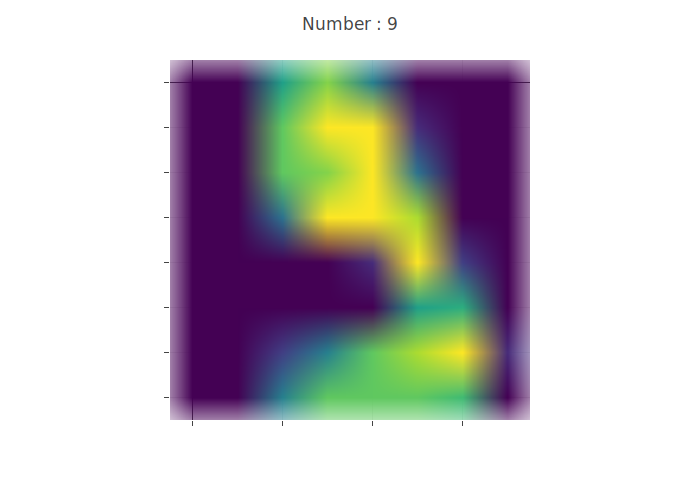

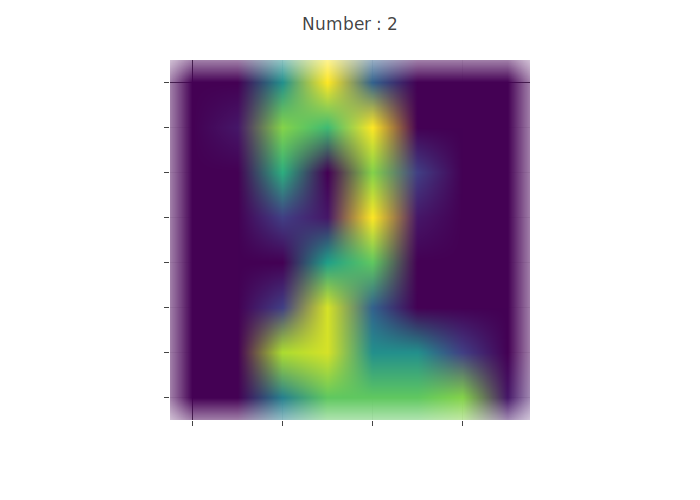

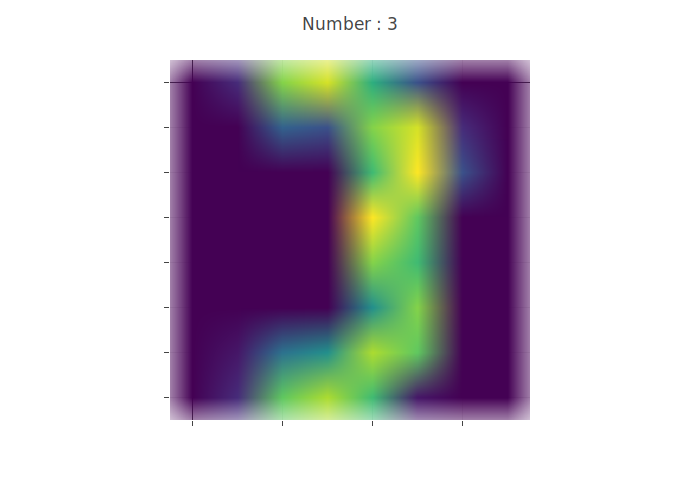

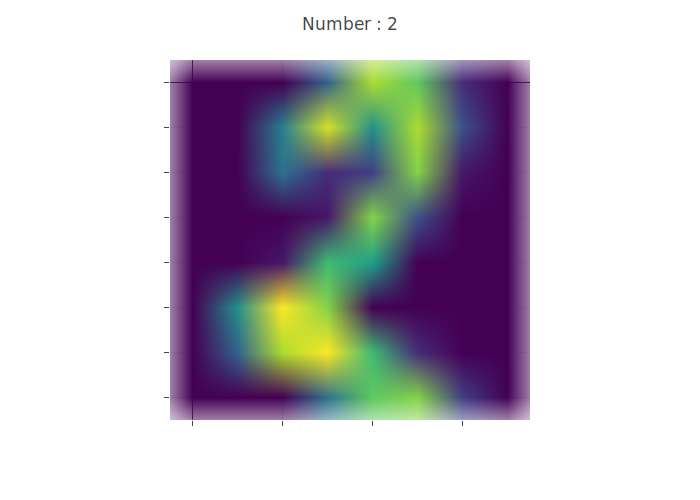

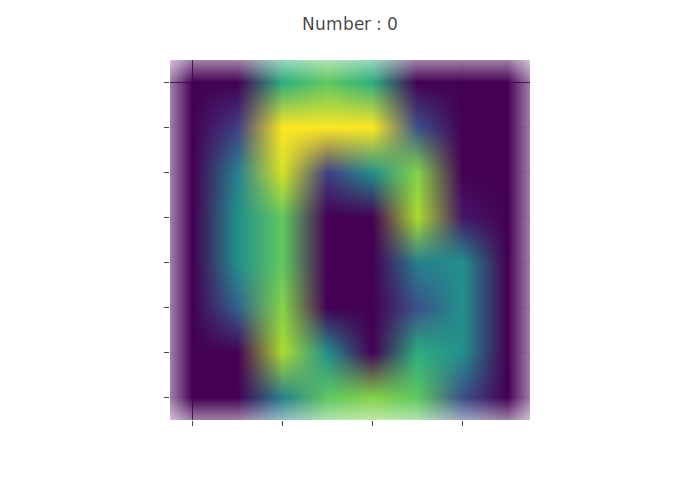

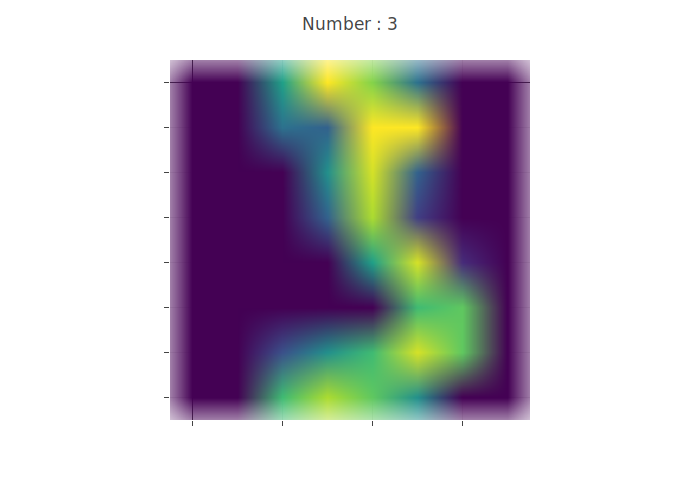

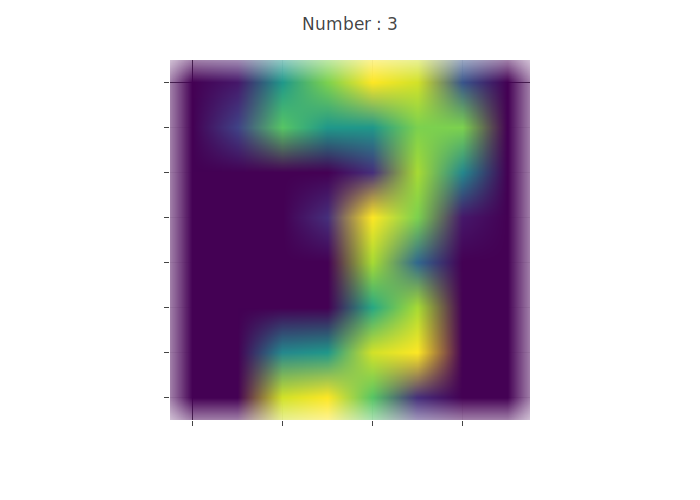

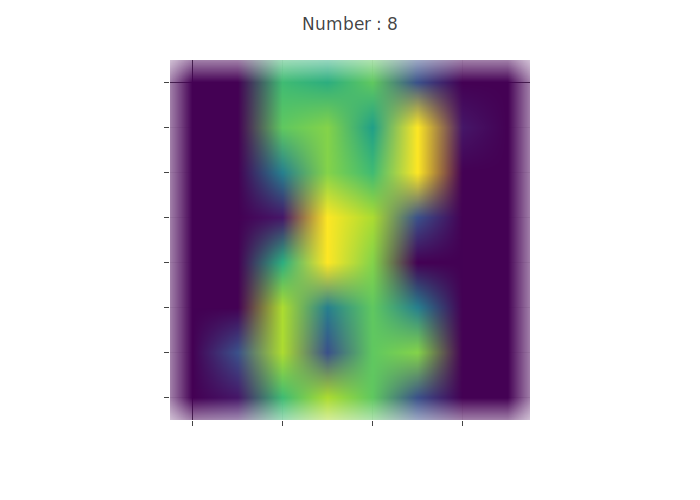

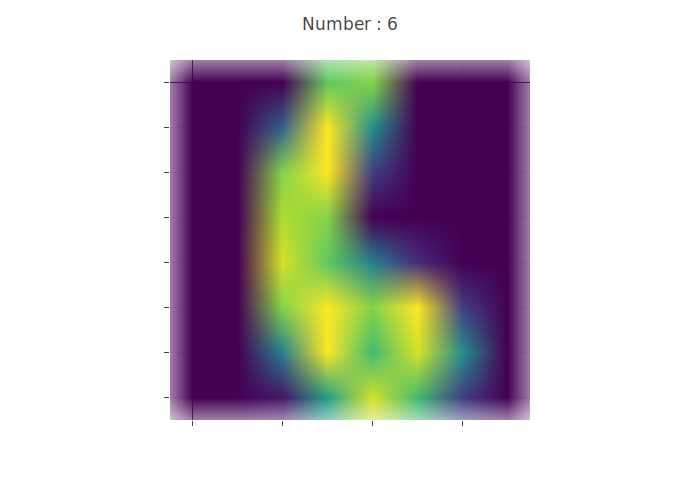

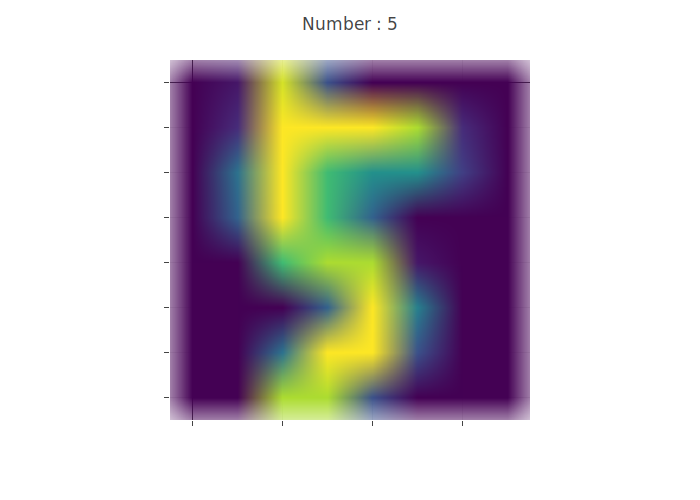

In [5]:
## random numbers visualisation
for i in np.random.randint(100, size=10):
  fig = px.imshow(numbers[i].reshape(8,8))
  fig.update_xaxes(showticklabels=False)
  fig.update_yaxes(showticklabels=False)
  fig.update_layout(title = "Number : {}".format(target[i]))
  fig.update_layout(coloraxis_showscale=False)
  fig.show()

5. We're going to apply the KMeans to our dataset, how many clusters do you think we're going to initialize the algorithm on?

---> 10 because we have 10 numbers in the dataset!

In [6]:
# verify how many unique values we have inside our target
np.unique(target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

6. Create your KMeans algorithm with the right number of clusters

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=10)

7. Let's evaluate our model, calculate the _accuracy_score_ of our predictions by importing the sklearn module. What do you conclude?

In [8]:
clusters = kmeans.fit_predict(numbers)

In [9]:
# Accuracy problem
from sklearn.metrics import accuracy_score
accuracy_score(target, clusters)

from sklearn.metrics import classification_report
print(classification_report(target,clusters))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       178
           1       0.00      0.01      0.01       182
           2       0.04      0.05      0.04       177
           3       0.00      0.00      0.00       183
           4       0.00      0.00      0.00       181
           5       0.00      0.00      0.00       182
           6       0.00      0.00      0.00       181
           7       0.00      0.00      0.00       179
           8       0.05      0.03      0.04       174
           9       0.04      0.07      0.05       180

    accuracy                           0.02      1797
   macro avg       0.01      0.02      0.01      1797
weighted avg       0.01      0.02      0.01      1797



8. Look at the coordinates of the centroids (cf. [cluster_center_](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.cluster.KMeans.html))

In [10]:
kmeans.cluster_centers_

array([[ 0.00000000e+00,  5.55111512e-17,  6.48936170e-01,
         1.02872340e+01,  1.14680851e+01,  1.67021277e+00,
         1.06382979e-02, -2.77555756e-17,  8.67361738e-19,
         5.31914894e-02,  4.40425532e+00,  1.53617021e+01,
         9.61702128e+00,  1.39361702e+00,  7.44680851e-02,
         4.16333634e-17,  4.33680869e-19,  4.14893617e-01,
         9.75531915e+00,  1.40319149e+01,  2.62765957e+00,
         5.53191489e-01,  1.06382979e-02, -1.38777878e-17,
         2.16840434e-19,  9.78723404e-01,  1.25106383e+01,
         1.29574468e+01,  6.51063830e+00,  3.32978723e+00,
         2.23404255e-01,  4.33680869e-19,  0.00000000e+00,
         1.90425532e+00,  1.37446809e+01,  1.43191489e+01,
         1.13936170e+01,  9.31914894e+00,  3.07446809e+00,
         0.00000000e+00,  1.73472348e-18,  9.46808511e-01,
         1.25744681e+01,  1.21170213e+01,  6.42553191e+00,
         1.00744681e+01,  8.48936170e+00,  3.72340426e-01,
        -2.60208521e-18,  6.38297872e-02,  8.37234043e+0

9. Try to visualize each of the centroids and compare them with the different labels. What do you notice?

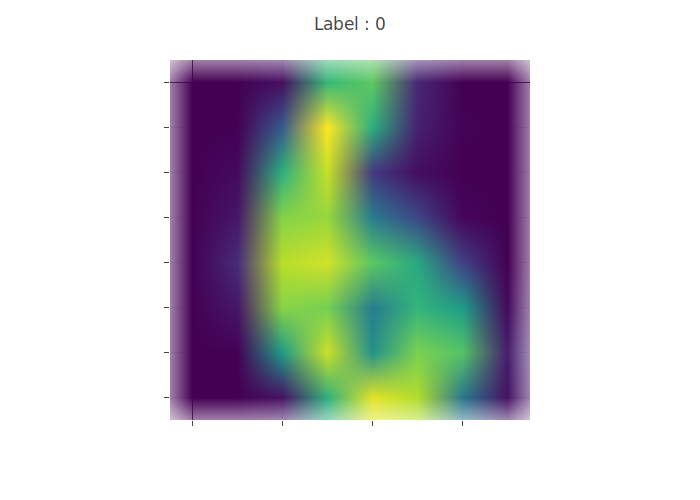

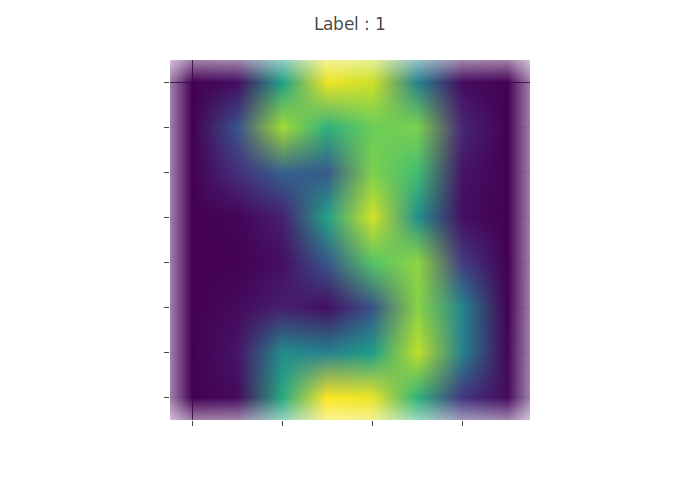

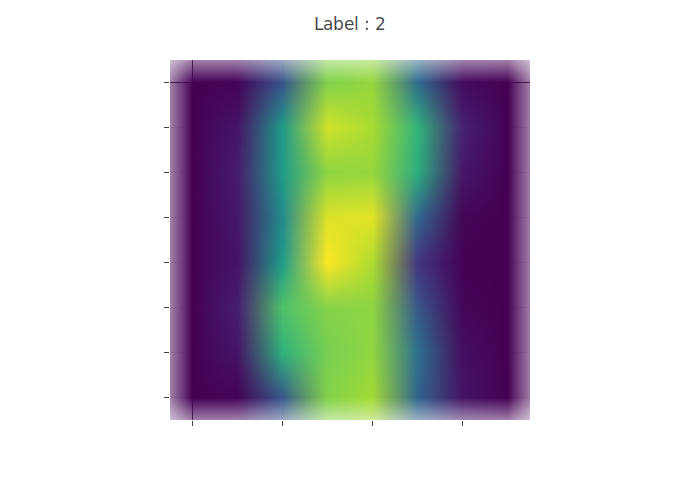

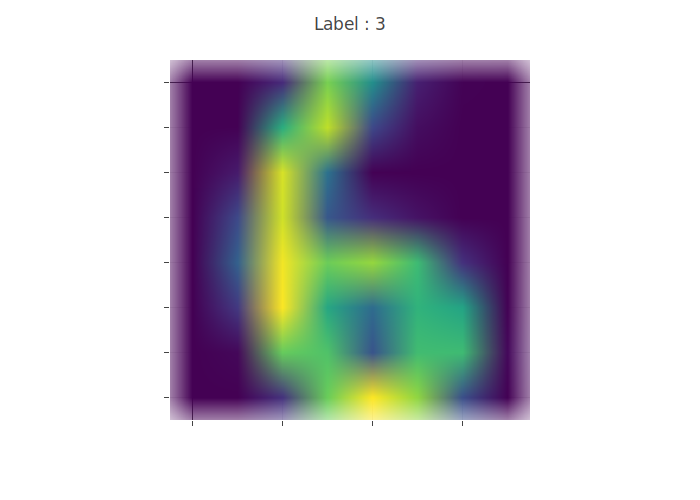

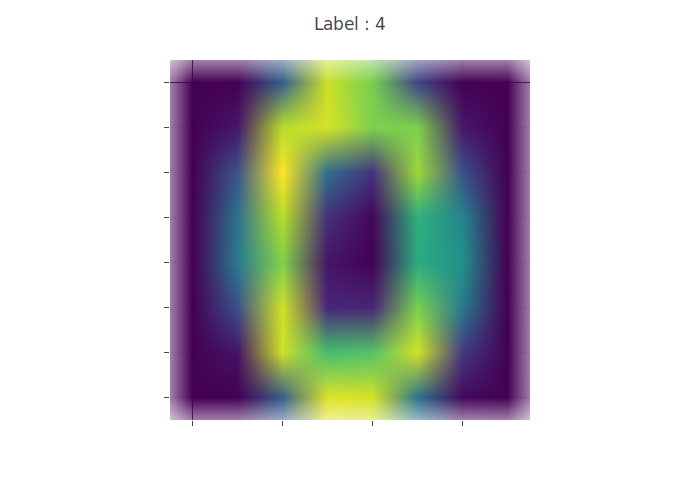

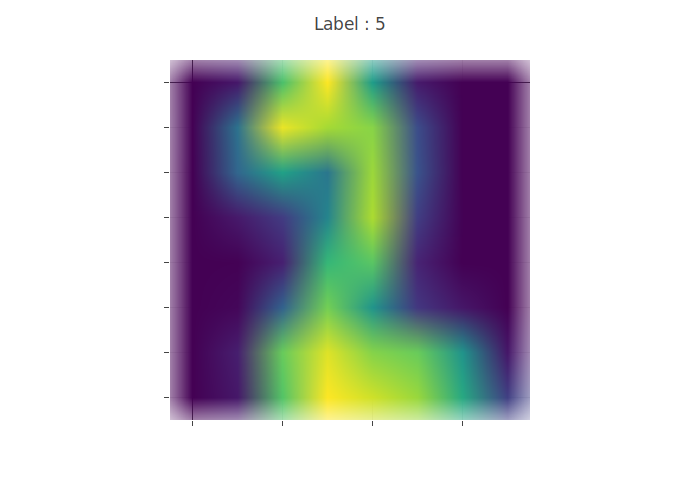

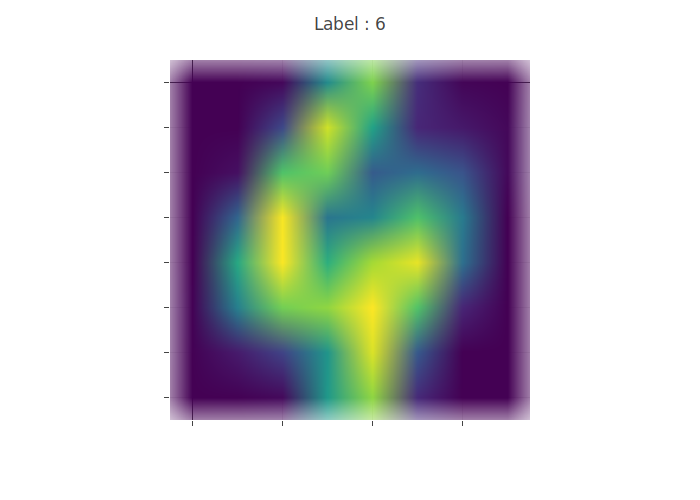

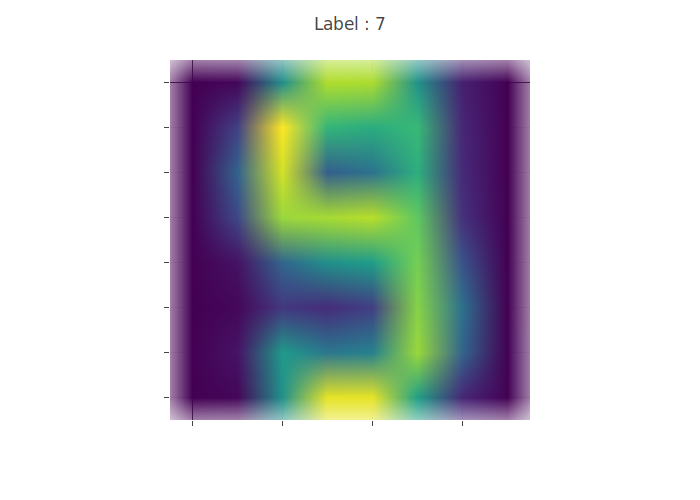

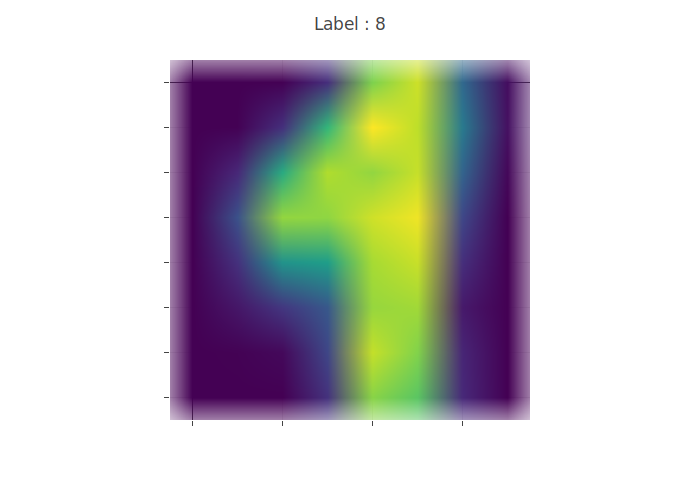

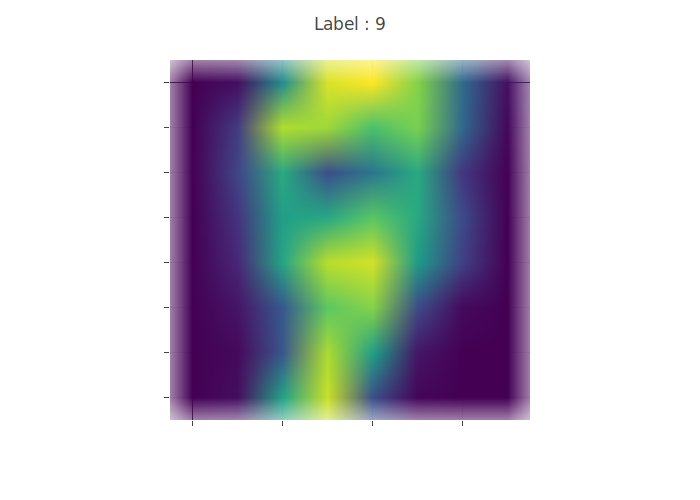

In [11]:
# Visualisation des centroïds
for i in range(10):
  fig = px.imshow(kmeans.cluster_centers_.reshape(10,8,8)[i])
  fig.update_xaxes(showticklabels=False)
  fig.update_yaxes(showticklabels=False)
  fig.update_layout(title = "Label : {}".format(i))
  fig.update_layout(coloraxis_showscale=False)
  fig.show()

----> Looks like good predictions! It just seems that centroids don't necessarily match the label.

10. We will try to match our cluster labels with the target values. Here are some clues:

    a. Identify the most frequent target value for observations in cluster 1.

In [12]:
# Let's look at which clusters each of the numbers belong in
clust = pd.DataFrame(target[clusters==1])
clust.iloc[:,0].value_counts()
# In this example, we can see that it looks like only the 9 belonging to cluster 1

0
3    161
9     25
2     14
5      2
1      1
8      1
Name: count, dtype: int64

b. Programming a loop which allows to create a label vector which contains for each observation the target value corresponding to the cluster to which it belongs.

In [13]:
# Generalize: We must find the mode of each of the arrays corresponds to the desired cluster
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(target[mask])[0]

11. Re-evaluate your model. What is your new *accuracy_score*?

In [14]:
# New accuracy
from sklearn.metrics import accuracy_score
accuracy_score(labels, target)

0.7100723427935448

12. Look at the numbers where our algorithm got it wrong the most via a confusion matrix...

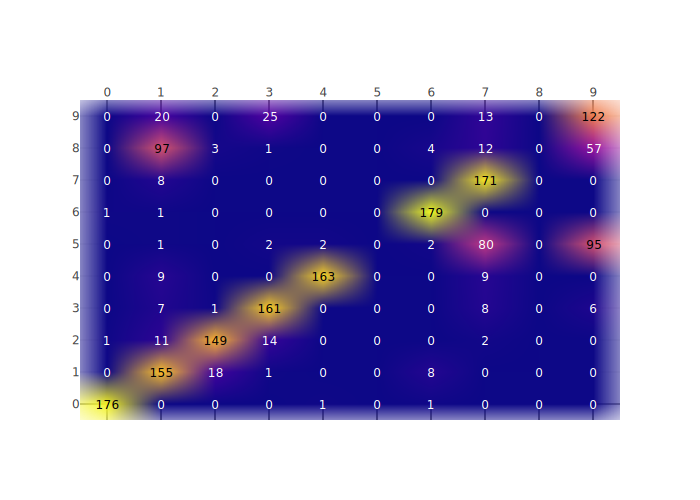

In [15]:
# Create heatmap with plotly
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(target, labels)

fig = ff.create_annotated_heatmap(mat,
                                  x = data.target_names.tolist(),
                                  y = data.target_names.tolist())


fig.show()